In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc, balanced_accuracy_score, roc_curve, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
random_state = 42

In [3]:
df = pd.read_csv('stats_df.csv')
print(df.shape)
print(df.columns)
df.head()

(421880, 41)
Index(['USER_ID', 'USER_SUBSCRIPTION_STATUS', 'N_TEAM_ASSOCIATIONS',
       'N_TEAM_GAMES_SCORED', 'N_TEAM_VIDEOS_STREAMED',
       'N_GAMES_SCORED_BY_USER', 'N_GAMES_STREAMED_BY_USER',
       'N_DAYS_USER_ACTIVE', 'TEAM_AGE_GROUPS_Between 13 - 18',
       'TEAM_AGE_GROUPS_Under 13', 'TEAM_AGE_GROUPS_Over 18',
       'TEAM_COMPETITION_LEVELS_school', 'TEAM_COMPETITION_LEVELS_club_travel',
       'TEAM_COMPETITION_LEVELS_recreational', 'TEAM_ROLES_family',
       'TEAM_ROLES_fan', 'TEAM_ROLES_manager', 'TEAM_ROLES_admin',
       'TEAM_ROLES_player', 'TEAM_SPORTS_baseball', 'TEAM_SPORTS_softball',
       'TEAM_SPORTS_soccer', 'TEAM_SPORTS_fieldHockey',
       'TEAM_SPORTS_basketball', 'TEAM_SPORTS_football',
       'TEAM_SPORTS_volleyball', 'TEAM_SPORTS_flagFootball',
       'TEAM_SPORTS_cheerleading', 'TEAM_SPORTS_hockey', 'TEAM_SPORTS_rugby',
       'TEAM_SPORTS_lacrosse', 'TEAM_SPORTS_wrestling',
       'TEAM_SPORTS_trackAndField', 'TEAM_SPORTS_other',
       'TEAM_SPORTS

,USER_ID,USER_SUBSCRIPTION_STATUS,N_TEAM_ASSOCIATIONS,N_TEAM_GAMES_SCORED,N_TEAM_VIDEOS_STREAMED,N_GAMES_SCORED_BY_USER,N_GAMES_STREAMED_BY_USER,N_DAYS_USER_ACTIVE,TEAM_AGE_GROUPS_Between 13 - 18,TEAM_AGE_GROUPS_Under 13,...,TEAM_SPORTS_wrestling,TEAM_SPORTS_trackAndField,TEAM_SPORTS_other,TEAM_SPORTS_rowingAndCrew,TEAM_SPORTS_tennis,TEAM_SPORTS_golf,TEAM_SPORTS_swimmingAndDiving,TEAM_SPORTS_bowling,TEAM_SPORTS_crossCountry,TEAM_SPORTS_waterPolo
0,2,0,0.0,0.0,0.0,0.0,0.0,49.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,2.0,1.0,0.0,0.0,0.0,374.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,11.0,125.0,0.0,0.0,0.0,658.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,6,0,3.0,30.0,0.0,0.0,0.0,85.0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0.0,0.0,0.0,0.0,0.0,8.0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Predictive Modeling
These models are build to identify specific users to target for moving from unsubscribed to subscribed.  They may not align with the recommendations from the stats models but are more about patterns found by the 'math' of the model algorithms.

In [4]:
df.columns

Index(['USER_ID', 'USER_SUBSCRIPTION_STATUS', 'N_TEAM_ASSOCIATIONS',
       'N_TEAM_GAMES_SCORED', 'N_TEAM_VIDEOS_STREAMED',
       'N_GAMES_SCORED_BY_USER', 'N_GAMES_STREAMED_BY_USER',
       'N_DAYS_USER_ACTIVE', 'TEAM_AGE_GROUPS_Between 13 - 18',
       'TEAM_AGE_GROUPS_Under 13', 'TEAM_AGE_GROUPS_Over 18',
       'TEAM_COMPETITION_LEVELS_school', 'TEAM_COMPETITION_LEVELS_club_travel',
       'TEAM_COMPETITION_LEVELS_recreational', 'TEAM_ROLES_family',
       'TEAM_ROLES_fan', 'TEAM_ROLES_manager', 'TEAM_ROLES_admin',
       'TEAM_ROLES_player', 'TEAM_SPORTS_baseball', 'TEAM_SPORTS_softball',
       'TEAM_SPORTS_soccer', 'TEAM_SPORTS_fieldHockey',
       'TEAM_SPORTS_basketball', 'TEAM_SPORTS_football',
       'TEAM_SPORTS_volleyball', 'TEAM_SPORTS_flagFootball',
       'TEAM_SPORTS_cheerleading', 'TEAM_SPORTS_hockey', 'TEAM_SPORTS_rugby',
       'TEAM_SPORTS_lacrosse', 'TEAM_SPORTS_wrestling',
       'TEAM_SPORTS_trackAndField', 'TEAM_SPORTS_other',
       'TEAM_SPORTS_rowingAndCre

In [5]:
unsub_users = df[df['USER_SUBSCRIPTION_STATUS'] == 0]
# Select a random set of rows from test_sample (e.g., 20% of test_sample)
test_sample = unsub_users.sample(frac=0.2, random_state=random_state)
# Remove these rows from the original df
df = df.drop(test_sample.index)
print(f'Number of rows left in df: {len(df)}')
print(f'Number of rows in test_sample: {len(test_sample)}')
print(f'Number of rows in unsub_users: {len(unsub_users)}')


Number of rows left in df: 346573
Number of rows in test_sample: 75307
Number of rows in unsub_users: 376537


In [6]:
def evaluate_model_performance(y_true, y_pred):
    metrics = {}

    # Binary classification
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred, zero_division=0, average='micro')
    metrics['Recall'] = recall_score(y_true, y_pred, zero_division=0, average='micro')
    metrics['F1 Score'] = f1_score(y_true, y_pred, zero_division=0, average='micro')
    metrics['Balanced Accuracy'] = balanced_accuracy_score(y_true, y_pred)
    metrics['ROC AUC'] = roc_auc_score(y_true, y_pred)

    return pd.DataFrame(metrics, index=[0])


In [7]:
# Define features and target
X = df.drop(['USER_SUBSCRIPTION_STATUS', 'USER_ID'], axis=1)
y = df['USER_SUBSCRIPTION_STATUS']

# Split into train and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
print(f'Number of rows in X_train: {len(X_train)}')

Number of rows in X_train: 277258


In [8]:
def plot_percision_recall_curve(model, X_test, y_test):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    au_pr = auc(recall, precision)
    plt.figure(figsize=(10, 5))
    plt.plot(recall, precision)
    plt.plot(recall, precision, label=f"AU-PR={au_pr:.2f}")
    plt.legend()
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

    fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"AUC={roc_auc:.2f}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()


    # Maximize F1 (balance precision & recall)
    candidate_thresholds = np.linspace(0, 1, 100)
    f1_scores = [f1_score(y_test, y_pred_proba >= t) for t in candidate_thresholds]
    best_f1_score = np.max(f1_scores)
    best_threshold = candidate_thresholds[np.argmax(f1_scores)]
    print("Best threshold by F1:", best_threshold)

    return best_threshold, best_f1_score

In [9]:
def train_and_evaluate(X_train, y_train, X_test, y_test, model_option):
    # Select model
    if model_option == 'logistic':
        model = LogisticRegression(max_iter=1000, random_state=random_state, class_weight='balanced')
    elif model_option == 'knn':
        model = KNeighborsClassifier(n_neighbors=5, weights='distance')
    elif model_option == 'random_forest':
        model = RandomForestClassifier(n_estimators=100, random_state=random_state, class_weight='balanced')
    elif model_option == 'gradient_boosting':
        model = GradientBoostingClassifier(n_estimators=100, random_state=random_state)
    elif model_option == 'mlp':
        model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=random_state)
    else:
        raise ValueError("model_option not found")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Evaluate
    results = evaluate_model_performance(y_test, y_pred)
    f1_threshold, best_f1_score = plot_percision_recall_curve(model, X_test, y_test)

    results['F1 Threshold'] = f1_threshold
    results['Best F1 Score'] = best_f1_score
    results['Model'] = model_option

    print(f"{model.__class__.__name__} Performance:")
    print(results) 

    return results, model


Training logistic model...


/Users/emmettstorts/.local/share/virtualenvs/dw-project-_G6D21it/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


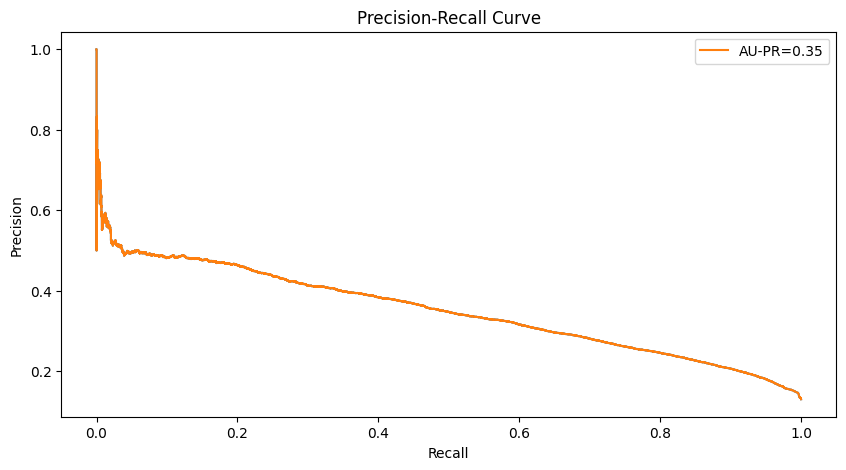

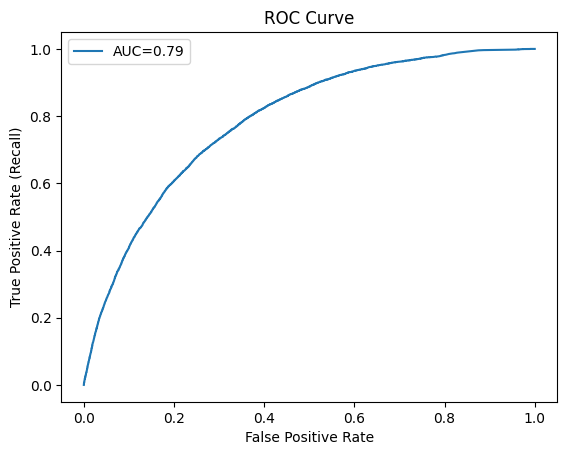

Best threshold by F1: 0.5858585858585859
LogisticRegression Performance:
   Accuracy  Precision    Recall  F1 Score  Balanced Accuracy   ROC AUC  \
0  0.721648   0.721648  0.721648  0.721648           0.715483  0.715483   

   F1 Threshold  Best F1 Score     Model  
0      0.585859         0.4165  logistic  
Training knn model...


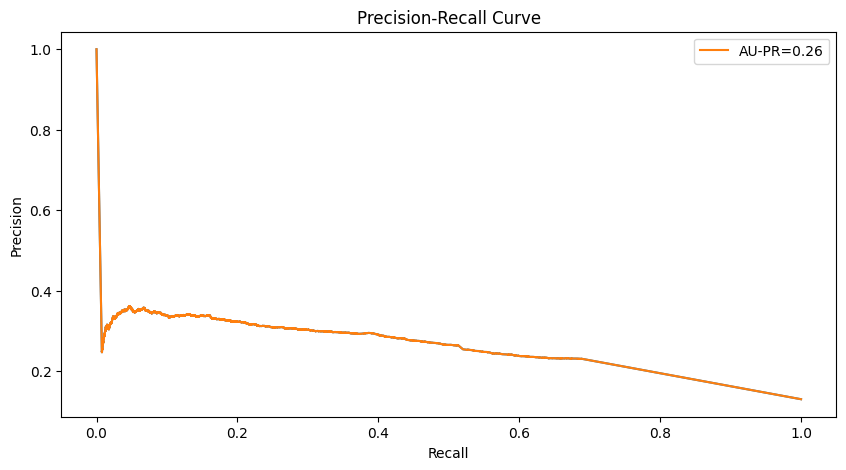

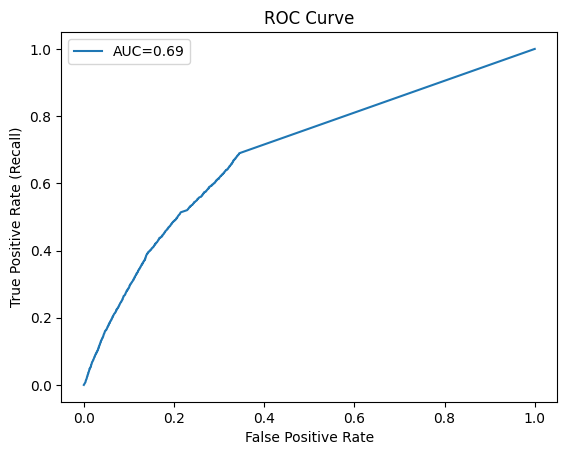

Best threshold by F1: 0.20202020202020204
KNeighborsClassifier Performance:
   Accuracy  Precision    Recall  F1 Score  Balanced Accuracy   ROC AUC  \
0  0.849138   0.849138  0.849138  0.849138           0.556904  0.556904   

   F1 Threshold  Best F1 Score Model  
0       0.20202       0.348235   knn  
Training random_forest model...


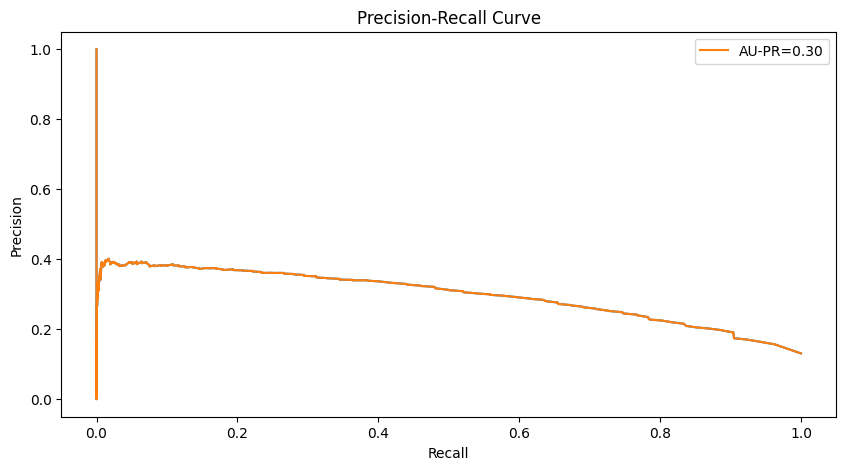

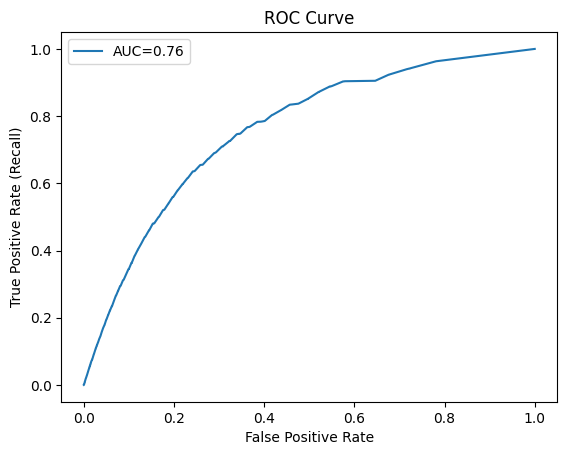

Best threshold by F1: 0.18181818181818182
RandomForestClassifier Performance:
   Accuracy  Precision    Recall  F1 Score  Balanced Accuracy   ROC AUC  \
0  0.859439   0.859439  0.859439  0.859439           0.544097  0.544097   

   F1 Threshold  Best F1 Score          Model  
0      0.181818       0.391961  random_forest  
Training gradient_boosting model...


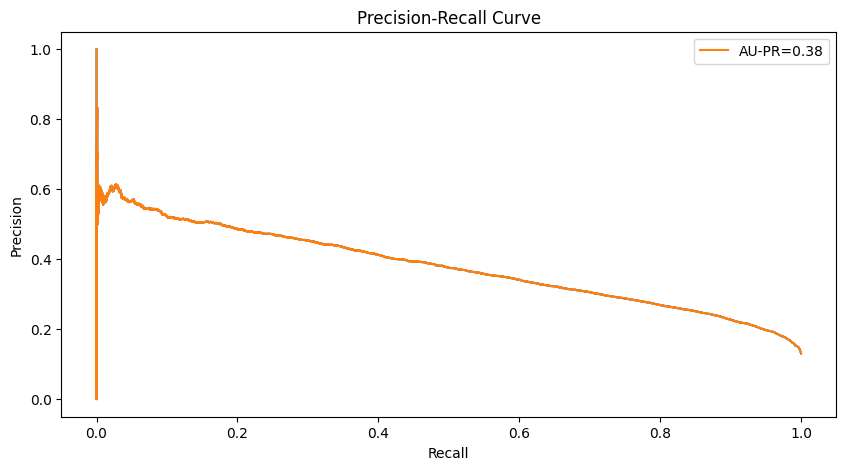

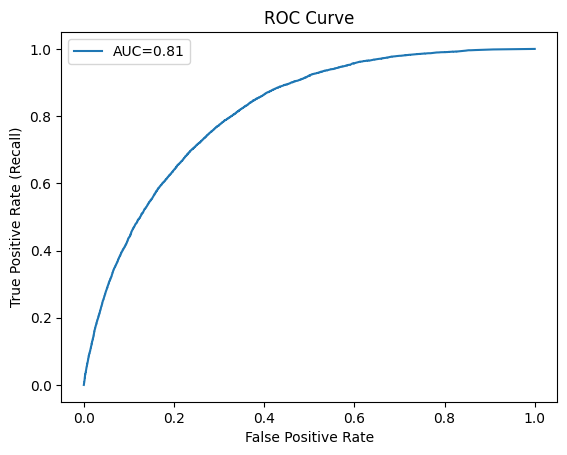

Best threshold by F1: 0.22222222222222224
GradientBoostingClassifier Performance:
   Accuracy  Precision    Recall  F1 Score  Balanced Accuracy   ROC AUC  \
0  0.870648   0.870648  0.870648  0.870648           0.530781  0.530781   

   F1 Threshold  Best F1 Score              Model  
0      0.222222       0.435886  gradient_boosting  
Training mlp model...


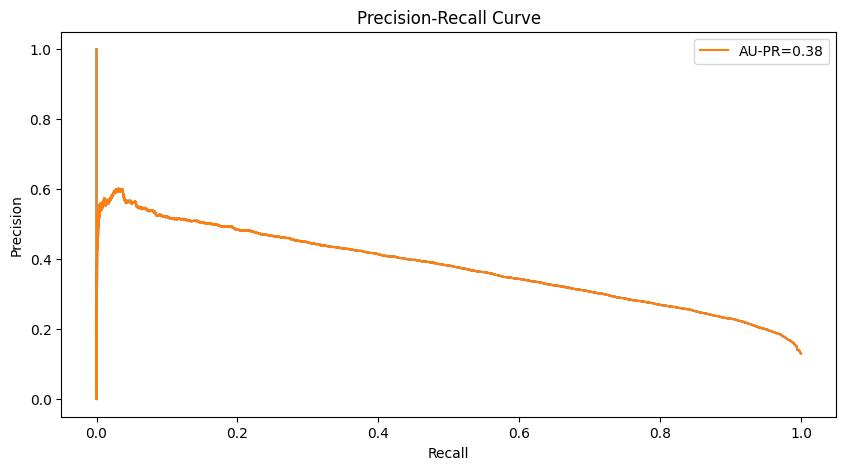

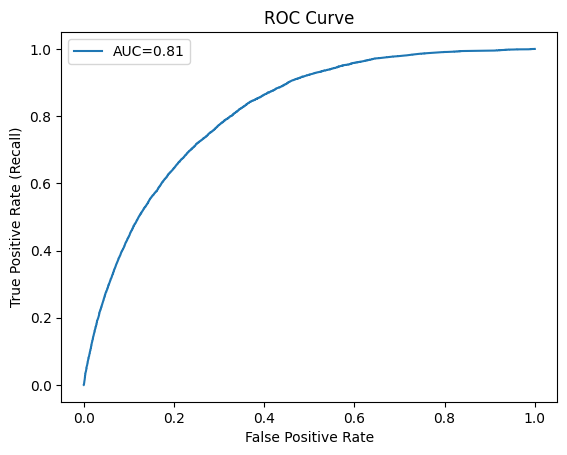

Best threshold by F1: 0.22222222222222224
MLPClassifier Performance:
   Accuracy  Precision   Recall  F1 Score  Balanced Accuracy   ROC AUC  \
0   0.87049    0.87049  0.87049   0.87049           0.532376  0.532376   

   F1 Threshold  Best F1 Score Model  
0      0.222222       0.437182   mlp  


In [10]:
model_results = pd.DataFrame()
models = {}
for model_option in ['logistic', 'knn', 'random_forest', 'gradient_boosting', 'mlp']:
    print(f"Training {model_option} model...")
    results, model = train_and_evaluate(X_train, y_train, X_test, y_test, model_option)
    model_results = pd.concat([model_results, results])
    models[model_option] = model

In [11]:
sorted_model_results = model_results.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)
sorted_model_results

,Accuracy,Precision,Recall,F1 Score,Balanced Accuracy,ROC AUC,F1 Threshold,Best F1 Score,Model
0,0.870648,0.870648,0.870648,0.870648,0.530781,0.530781,0.222222,0.435886,gradient_boosting
1,0.870490,0.870490,0.870490,0.870490,0.532376,0.532376,0.222222,0.437182,mlp
2,0.859439,0.859439,0.859439,0.859439,0.544097,0.544097,0.181818,0.391961,random_forest
3,0.849138,0.849138,0.849138,0.849138,0.556904,0.556904,0.202020,0.348235,knn
4,0.721648,0.721648,0.721648,0.721648,0.715483,0.715483,0.585859,0.416500,logistic


In [12]:
best_model = models[sorted_model_results.loc[0, 'Model']]

In [13]:
y_proba = best_model.predict_proba(test_sample.drop(columns=['USER_ID', 'USER_SUBSCRIPTION_STATUS']))[:, 1]
f1_threshold = model_results.sort_values(by='F1 Score', ascending=False).reset_index(drop=True).loc[0, 'F1 Threshold']
test_sample['PREDICTED_SUBSCRIPTION_STATUS'] = (y_proba >= f1_threshold).astype(int)
test_sample['PREDICTED_SUBSCRIPTION_STATUS_PROBABILITY'] = y_proba
print(f'Percent of test_sample predicted to subscribe: {test_sample["PREDICTED_SUBSCRIPTION_STATUS"].mean().round(4)*100}')

Percent of test_sample predicted to subscribe: 16.72


In [14]:
test_sample.to_csv('test-sample-predicted-subscribers.csv', index=False)

## The Story
- The data is unbalanced (there are much more non-subscribers than subscribers) thus special adjustments are made to train a good model.
- A few model algorthms were train, accounting for imbalance. The best was choosen based on F1-Score
    - Why F1-Score? It's a better metric than accuracy (and balanced accuracy) because it's a mix of Precision and Recall.  These metrics focus more on the business problem vs building a good model.  In the business problem we want to balance identifying potential subscribers while not spending a lot on marketing and annoying users.
- The best model was a gradint boosted tree with an F1-Score of 87%
    - This was not hyper-tuned but would be if had more time.
- With the best model an optimal threshold to label the user as a predicted subscriber was calcualted. 
    - However this may not be extremely useful, more of a guide, given how this data would be used.
- Experiement to test modeling effectiveness:
    - The entire test_sample dataset (all users who are not currently subscribed) should be contacted via marketing channels (if possible) asking to subscribe. All contact metrics should be tracked and after some predetermined amount of time each user should be evaluated if they subscribed or not. (For example after 1 week has the user subscribed or not).  With this data the model can be evaluated 'in the real world' on whether it could effectively indentified users to convert to subscriptions. 
    - Based on these results it can be determined if the model can predict which users will convert.  If it can, then going forward the whole set doesn't need to be contacted, just the users the model identifies. If the model was not effective at identifying users who will convert, adjustments can be made, starting from the input data going forward.